In [290]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
# import csv
""" 파일 따로 저장하는 방법 Ex
fout = open('C:\Git\KDT\BigData\EX_PY07\daegu-utf8.csv', 'w', newline='', encoding='utf-8-sig')
wr = csv.writer(fout)
fout.close()
"""
file_name = 'GlobalLandTemperatures.csv'
phili = '필리핀태풍.xlsx'
time = 'datttime.xlsx'
Climate = pd.read_csv(file_name, encoding = 'utf-8')
Philippines = pd.read_excel(phili)
time = pd.read_excel(time)
Climate['dt'] = pd.to_datetime(Climate['dt'])
Climate.drop(['AverageTemperatureUncertainty'], axis=1, inplace=True)
Climate = Climate[(Climate['dt'].dt.year >= 1980) & (Climate['dt'].dt.year <= 2010)]
Climate

dt  AverageTemperature   Country
2834   1980-01-01              -4.073     횇land
2835   1980-02-01              -6.484     횇land
2836   1980-03-01              -3.947     횇land
2837   1980-04-01               2.928     횇land
2838   1980-05-01               6.154     횇land
...           ...                 ...       ...
577424 2010-08-01              18.260  Zimbabwe
577425 2010-09-01              23.109  Zimbabwe
577426 2010-10-01              25.943  Zimbabwe
577427 2010-11-01              25.211  Zimbabwe
577428 2010-12-01              23.757  Zimbabwe

[90396 rows x 3 columns]

In [291]:
Climate = Climate[Climate['Country']=='Philippines']

In [292]:
Philippines_temp = Climate
Philippines_temp.drop(['Country'],axis=1, inplace=True)
Philippines_temp

C:\Users\kjy19\AppData\Local\Temp\ipykernel_14580\1787132791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Philippines_temp.drop(['Country'],axis=1, inplace=True)


dt  AverageTemperature
413216 1980-01-01              25.412
413217 1980-02-01              25.531
413218 1980-03-01              26.773
413219 1980-04-01              27.433
413220 1980-05-01              28.140
...           ...                 ...
413583 2010-08-01              27.489
413584 2010-09-01              27.603
413585 2010-10-01              27.124
413586 2010-11-01              26.840
413587 2010-12-01              26.230

[372 rows x 2 columns]

In [293]:
time

1981-01-01
0   1981-02-01
1   1981-03-01
2   1981-04-01
3   1981-05-01
4   1981-06-01
..         ...
342 2009-08-01
343 2009-09-01
344 2009-10-01
345 2009-11-01
346 2009-12-01

[347 rows x 1 columns]

In [294]:
# time[1981-01-01 00:00:00]

In [295]:
Philippines['Date'] = Philippines['year'].astype('string') + '-' + Philippines['month'].astype('string')

In [296]:
Philippines.drop(['year','month','day'], axis=1, inplace=True)

In [297]:
Philippines['Date'] = pd.to_datetime(Philippines['Date'])
# Climate['dt'] = pd.to_datetime(Climate['dt'])

In [298]:
Philippines

Unnamed: 0    ID  hour                  grade  Latitude  Longitude  \
0          28096  8002     0  Severe Tropical Storm       136       1267   
1          28097  8002     6  Severe Tropical Storm       143       1258   
2          28098  8002    12  Severe Tropical Storm       148       1250   
3          28099  8002    18  Severe Tropical Storm       155       1244   
4          28100  8002     0                Typhoon       160       1240   
...          ...   ...   ...                    ...       ...        ...   
4104       57490  1013     0                Typhoon       195       1175   
4105       57491  1013     6                Typhoon       199       1176   
4106       57492  1013    12                Typhoon       202       1179   
4107       57493  1013    18                Typhoon       205       1180   
4108       57494  1013     0                Typhoon       209       1182   

      Central pressure       Date  
0                  985 1980-05-01  
1                  980 1980-05-01  
2                  975 1980-05-01  
3                  970 1980-05-01  
4                  965 1980-05-01  
...                ...        ...  
4104               940 2010-10-01  
4105               935 2010-10-01  
4106               935 2010-10-01  
4107               945 2010-10-01  
4108               950 2010-10-01  

[4109 rows x 8 columns]

In [299]:
PhilippinesDF = pd.DataFrame(columns=['dt','Created_Cyclone'])
pil_li = Philippines['Date'].unique()
idx = 0
for i in pil_li:
    PhilippinesDF.loc[idx] = [i,len(Philippines[Philippines['Date']==i]['ID'].unique())]
    idx += 1


In [300]:
Philippines_temp

dt  AverageTemperature
413216 1980-01-01              25.412
413217 1980-02-01              25.531
413218 1980-03-01              26.773
413219 1980-04-01              27.433
413220 1980-05-01              28.140
...           ...                 ...
413583 2010-08-01              27.489
413584 2010-09-01              27.603
413585 2010-10-01              27.124
413586 2010-11-01              26.840
413587 2010-12-01              26.230

[372 rows x 2 columns]

In [301]:
Philippines_temp['dt'], len(Philippines_temp['dt'].unique())

(413216   1980-01-01
 413217   1980-02-01
 413218   1980-03-01
 413219   1980-04-01
 413220   1980-05-01
             ...    
 413583   2010-08-01
 413584   2010-09-01
 413585   2010-10-01
 413586   2010-11-01
 413587   2010-12-01
 Name: dt, Length: 372, dtype: datetime64[ns],
 372)

In [302]:
PhilippinesDF.set_index('dt',inplace=True)
Philippines_temp.set_index('dt',inplace=True)


In [303]:
# Philippines_temp

In [304]:
merged_df = pd.concat([Philippines_temp, PhilippinesDF], axis=1, join='inner', keys=['temp', 'cyclone'])    # outer

In [319]:
merged_df
# merged_df[['temp','temp']]

temp         cyclone
           AverageTemperature Created_Cyclone
dt                                           
1980-05-01             28.140               3
1980-06-01             27.491               1
1980-07-01             27.254               3
1980-09-01             26.961               2
1980-10-01             26.703               1
...                       ...             ...
2009-11-01             26.829               1
2010-07-01             27.658               2
2010-08-01             27.489               3
2010-09-01             27.603               1
2010-10-01             27.124               1

[207 rows x 2 columns]

In [327]:
merged_df.corr()

temp         cyclone
                           AverageTemperature Created_Cyclone
temp    AverageTemperature           1.000000       -0.094763
cyclone Created_Cyclone             -0.094763        1.000000

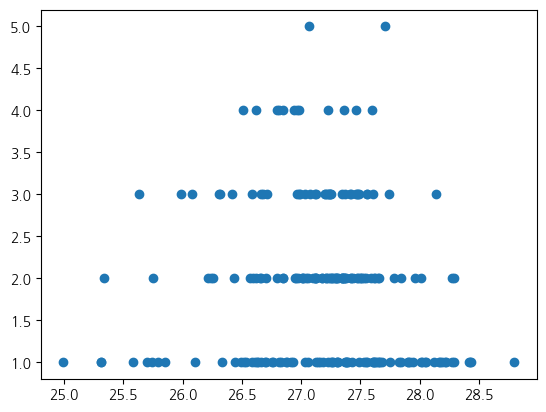

In [322]:
plt.scatter(merged_df['temp','AverageTemperature'].values, merged_df['cyclone','Created_Cyclone'].values)

Text(0.5, 1.0, '필리핀 월별 평균 기온 - 태풍 발생')

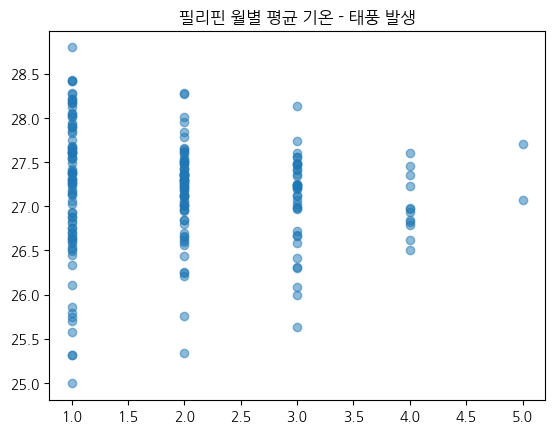

In [328]:
plt.scatter( merged_df['cyclone','Created_Cyclone'].values,merged_df['temp','AverageTemperature'].values, alpha = 0.5)
plt.title('필리핀 월별 평균 기온 - 태풍 발생')
# plt.